The purpose of this code is to plot average force profiles over the 4s of grip force exertion during the MVC and association phase. This will serve to illustrate any differences or lack thereof, between force produced in the presence and absence of treatment. 

In [2]:
% matplotlib inline

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

For this, we will only load the csv file containing the raw force profiles across all the different forces. 

In [3]:
rootpath = "E:\Thesis work\Pendrive\Risk preferences in PD\Effort choices\Analysis"
filename = "Rawforce.csv"
Volts = pd.read_csv(os.path.join(rootpath,filename))

PhaseVar=1 corresponds to MVC phase. Subsetting MVC phase and taking the average across 3 trials for each subject in each treatment condition. Further cleaning it up to drop all the classifiers and retain only the force profile. Force data was collected at 2000 Hz for 4 s, giving an overall 8000 frames per trial. 

In [22]:
MVCforce = Volts[Volts['PhaseVar']==1].groupby(['TREAT','SID']).mean()

In [23]:
MVCforce.drop(['TrialNum','PhaseVar','Mean','Std','MaxVolt',MVCforce.columns[0]],inplace=True,axis=1)
MVCforce.head()

0         1         2         3         4         5  \
TREAT SID                                                               
1.0   1.0  0.127523  0.127523  0.129269  0.129269  0.127523  0.127523   
      2.0  0.012228  0.010481  0.012228  0.010481  0.012228  0.012228   
      3.0  0.017469  0.017469  0.019216  0.017469  0.019216  0.019216   
      4.0  0.006988  0.003494  0.003494  0.005241  0.005241  0.003494   
      5.0  0.008734  0.010481  0.008734  0.010481  0.008734  0.008734   

                  6         7         8         9    ...         7990  \
TREAT SID                                            ...                
1.0   1.0  0.127523  0.127523  0.129269  0.129269    ...     0.054731   
      2.0  0.012228  0.012228  0.012228  0.012228    ...     0.187495   
      3.0  0.019216  0.019216  0.019216  0.019216    ...     0.564532   
      4.0  0.005241  0.005241  0.003494  0.006988    ...     0.224179   
      5.0  0.010481  0.008734  0.008734  0.010481    ...    -0.109187   

               7991      7992      7993      7994      7995      7996  \
TREAT SID                                                               
1.0   1.0  0.052984  0.052984  0.052984  0.052984  0.054731  0.054731   
      2.0  0.187495  0.187495  0.187495  0.185748  0.187495  0.187495   
      3.0  0.564532  0.562786  0.564532  0.564532  0.564532  0.562786   
      4.0  0.224179  0.224179  0.225926  0.224179  0.225926  0.224179   
      5.0 -0.109187 -0.109187 -0.109187 -0.109187 -0.109187 -0.109187   

               7997      7998      7999  
TREAT SID                                
1.0   1.0  0.052984  0.054731  0.052984  
      2.0  0.187495  0.187495  0.187495  
      3.0  0.564532  0.562786  0.562786  
      4.0  0.224179  0.224179  0.224179  
      5.0 -0.109187 -0.109187 -0.109187  

[5 rows x 8000 columns]

Further, the group average and SEM are calculated for descriptive figure plotting. It shoould be noted that these are for representation purposes - to show that the maximum grip force wasn't a result of one sharp spike in force production over the time recorded. Participants are capable of maintaining the force produced. 

In [24]:
MVCforce_mean = MVCforce.groupby(['TREAT']).mean()
MVCforce_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
TREAT,,,,,,,,,,,,,,,,,,,,,
1.0,0.042661,0.042753,0.042753,0.043212,0.043029,0.042477,0.042569,0.042661,0.041925,0.042293,...,0.215460,0.215460,0.21546,0.215552,0.215552,0.215828,0.215736,0.215552,0.215736,0.215552
2.0,0.021422,0.020595,0.020411,0.021606,0.020871,0.021238,0.021146,0.021055,0.021055,0.020687,...,0.208212,0.208028,0.20766,0.208028,0.208028,0.207936,0.207936,0.207936,0.207936,0.208028


In [25]:
MVCforce_error = MVCforce.groupby(['TREAT']).std()/np.sqrt(MVCforce.shape[0]/2)
MVCforce_error.head()

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
TREAT,,,,,,,,,,,,,,,,,,,,,
1.0,0.015496,0.015554,0.015641,0.015515,0.015609,0.015502,0.015303,0.015418,0.015389,0.015354,...,0.055742,0.055747,0.055807,0.055745,0.055794,0.055732,0.055789,0.055747,0.055794,0.055753
2.0,0.007702,0.007786,0.007566,0.007603,0.007637,0.007593,0.007690,0.007522,0.007505,0.007653,...,0.067196,0.067126,0.067125,0.067181,0.067145,0.067067,0.067129,0.067170,0.067122,0.067153


The following cell plots the average force profiles for the MVC phase during treatment ON and OFF conditions. Qualitativly it is noticeable that 1. the average maximum force produced is similar across conditions. 2. there is a possibility that the rate of force production may be higher when treated. 

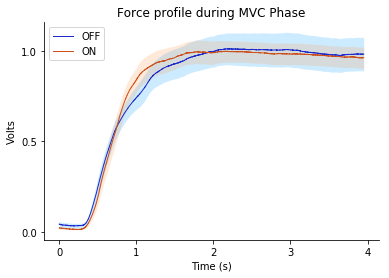

In [53]:
x_axis = np.arange(0,7900)
fig,ax=plt.subplots()
plt.fill_between(x_axis,MVCforce_mean.iloc[0,0:7900] + MVCforce_error.iloc[0,0:7900],MVCforce_mean.iloc[0,0:7900] - MVCforce_error.iloc[0,0:7900],alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',linewidth=0)
MVCforce_mean.iloc[0,0:7900].plot(color='#1B2ACC',linewidth=1)
plt.fill_between(x_axis,MVCforce_mean.iloc[1,0:7900] + MVCforce_error.iloc[1,0:7900],MVCforce_mean.iloc[1,0:7900] - MVCforce_error.iloc[1,0:7900],alpha=0.2, edgecolor='#CC4F1B', facecolor='#FF9848',linewidth=0)
MVCforce_mean.iloc[1,0:7900].plot(color='#CC4F1B',linewidth=1)
plt.xticks(np.arange(0,8001,step=2000),('0','1','2','3','4'));
plt.xlabel('Time (s)')
plt.yticks(np.arange(0,1.01,step=0.5));
plt.ylabel('Volts')
plt.legend(['OFF','ON']);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Force profile during MVC Phase');